<a href="https://colab.research.google.com/github/musinaa/Saving_and_restoring_models_in_Python_exercise.ipynb/blob/eda/Saving_and_restoring_models_in_Python_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Saving and restoring models in Python
© ExploreAI Academy

In this exercise, we save a trained model and restore it to make additional predictions on new inputs.

## Learning objectives

By the end of this train, you should be able to:

* Use pickling to save and re-use previously trained models.

## Exercises

We are provided with the `Crop_yield` dataset that contains various factors that could influence the yield of a particular crop across different regions.

We are interested in how some features, namely: `Temperature`, `Rainfall`, `Fertilizer_usage`, and `Pesticide_usage` influence the yield of the crop.

### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/Crop_yield.csv")
df.head(5)

,Region,Temperature,Rainfall,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Irrigation,Crop_Variety,Yield
0,East,23.152156,803.362573,Clayey,204.792011,20.767590,1,Variety B,40.316318
1,West,19.382419,571.567670,Sandy,256.201737,49.290242,0,Variety A,26.846639
2,North,27.895890,-8.699637,Loamy,222.202626,25.316121,0,Variety C,-0.323558
3,East,26.741361,897.426194,Loamy,187.984090,17.115362,0,Variety C,45.440871
4,East,19.090286,649.384694,Loamy,110.459549,24.068804,1,Variety B,35.478118


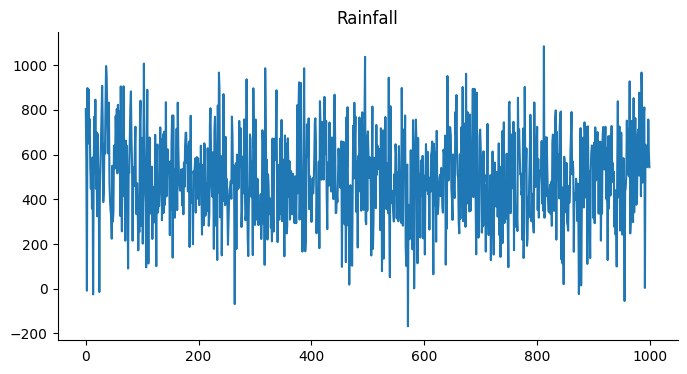

In [3]:
# @title Rainfall

from matplotlib import pyplot as plt
df['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

### Exercise 1

We begin by training and evaluating a multiple linear regression model to map the relationship between the features: `Temperature`, `Rainfall`, `Fertilizer_usage`, and `Pesticide_usage` and the response variable, `Yield`. This model will enable us to predict crop yields based on the given factors.

In [ ]:
# Your solution here...

### Exercise 2

We want to be able to conveniently retrieve and use the model for predictions in future. We therefore need to persist the trained model by saving it to a file.

Use the `Pickle` library to serialize the model and store it in a file named `crop_yield_model.pkl`.

In [ ]:
# Your solution here...

### Exercise 3

We have received a new set of conditions for which we need to predict the crop yield. To accomplish this, we'll utilize the model we previously trained and saved.

New conditions:
- Temperature - `25`
- Rainfall - `150`
- Fertilizer usage - `200`  
- Pesticide usage - `30`

Prepare the new data, load the saved model and use it to make predictions on the given feature values.

In [4]:
# Your solution here...
df.head()

,Region,Temperature,Rainfall,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Irrigation,Crop_Variety,Yield
0,East,23.152156,803.362573,Clayey,204.792011,20.767590,1,Variety B,40.316318
1,West,19.382419,571.567670,Sandy,256.201737,49.290242,0,Variety A,26.846639
2,North,27.895890,-8.699637,Loamy,222.202626,25.316121,0,Variety C,-0.323558
3,East,26.741361,897.426194,Loamy,187.984090,17.115362,0,Variety C,45.440871
4,East,19.090286,649.384694,Loamy,110.459549,24.068804,1,Variety B,35.478118


## Solutions

### Exercise 1

In [5]:
# Define predictors and target variable
X = df[['Temperature', 'Rainfall', 'Fertilizer_Usage', 'Pesticide_Usage']]
y = df['Yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")

Test MSE: 0.3346060708725867
Test R-squared: 0.9963871774411283


We train a model using a subset of the features from the `Crop_yield` dataset.

### Exercise 2

In [6]:
# Define the path where the model will be saved.
model_save_path = 'crop_yield_model.pkl'

# Save the trained model to a file
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_save_path}")

Model saved to crop_yield_model.pkl


We specify that we want to save our model in a pickle file, indicated by the `.pkl` extension.

We open the file in **write-binary (`wb`)** mode - if the file doesn't exist, it will be created. Otherwise, its contents will be overwritten.

We then use the `pickle.dump()` method to serialize the model object and saving it into the file.

### Exercise 3

In [7]:
# A dictionary to store the new set of conditions
new_conditions = {
    'Temperature': [25],  # average temperature in °C
    'Rainfall': [150],  # total rainfall in mm
    'Fertilizer_Usage': [200],  # fertilizer used in kg per hectare
    'Pesticide_Usage': [30]  # pesticide used in liters per hectare
}

# Convert to DataFrame
new_conditions_df = pd.DataFrame(new_conditions)

# This is where the model is saved
model_load_path = 'crop_yield_model.pkl'

# Load the updated model
with open(model_load_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the model to predict the yield for the new conditions
predicted_yield = loaded_model.predict(new_conditions_df)

print(f"Predicted Yield for the new conditions: {predicted_yield[0]} tonnes per hectare")

Predicted Yield for the new conditions: 8.172860333818216 tonnes per hectare


We start by preparing the new data for compatibility with the model's **expected input format**, that is, a tabular format.

We then open the file where we saved the model in **binary read (`rb`)** mode which is required for reading pickle files.

The `pickle.load()` method deserializes the model from the file back into a Python object.

We are then able to use the loaded model to predict the yield based on the new conditions provided.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>